# 对比验证站点图

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


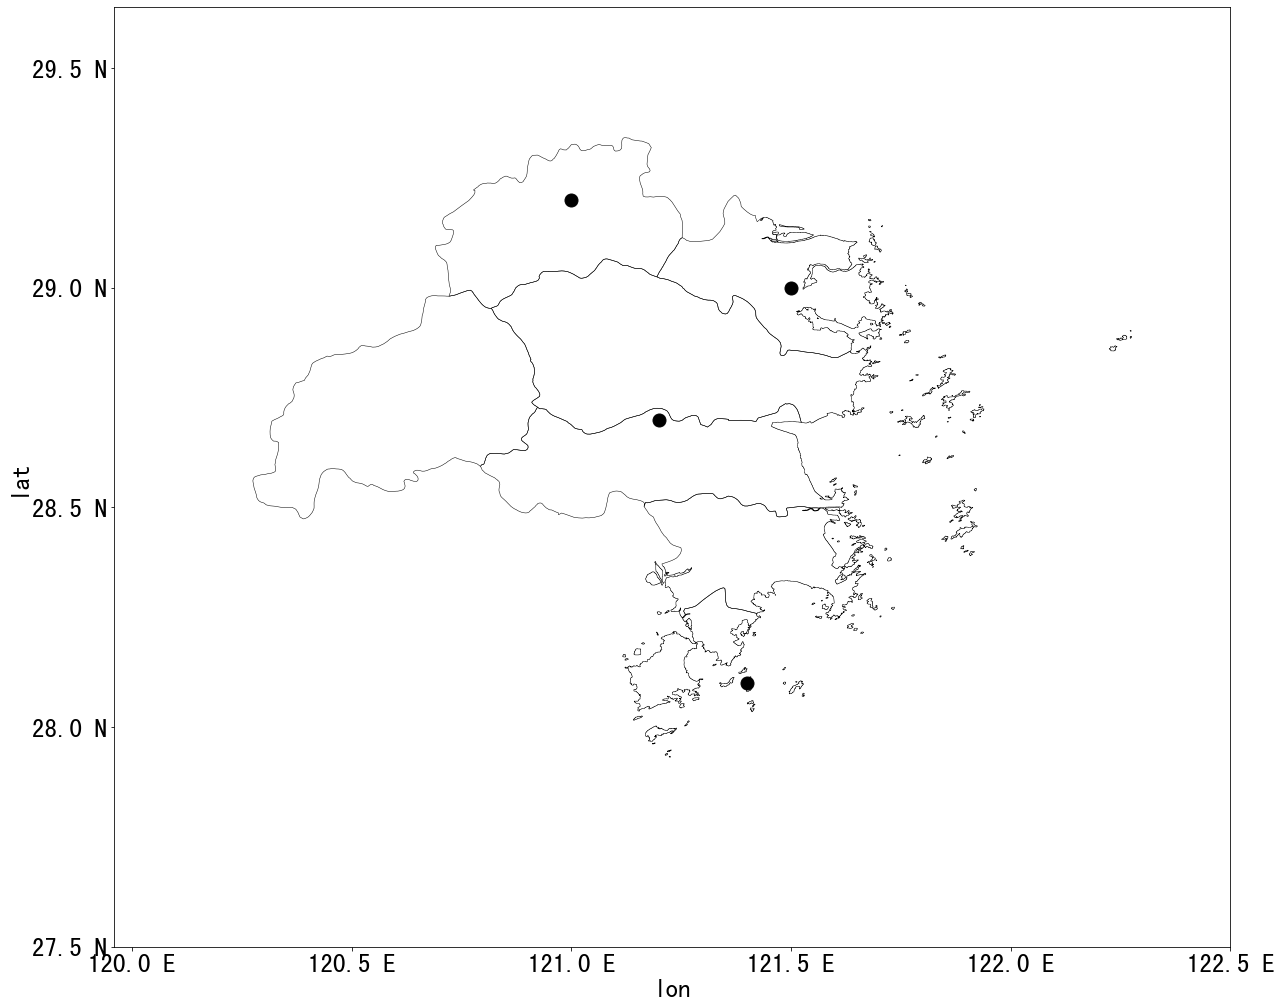

In [3]:
#!/usr/bin/python3
# author : zhangjiawei
# @time : 2019/5/31 16:36
# project_name : untitled
 
 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
 
# 运用 Basemap 函数我们可以在绘图区域中绘制地理信息相关的图像，当参数 projection 的值为 'ortho' #时，我们将得到一个如下所示的地球仪截面：
 
fig = plt.figure(figsize=(20, 20))
# m = Basemap(projection='lcc', resolution=None,
#             width=1E6, height=1E6,
#             lat_0=27, lon_0=121, )
m=Basemap(llcrnrlon=119.96,llcrnrlat=27.56,urcrnrlon=122.15,urcrnrlat=29.64)
#m.etopo(scale=0.5, alpha=0.5)

shpfile = "/home/liyuan3970/study_demo/met_plot/Basemap/"
m.readshapefile(shpfile+'taizhou', 'taizhou')
#m.drawcoastlines(color='blue')
m.drawcountries(color='blue')


plt.xlabel('lon', fontsize=25)
plt.ylabel('lat', fontsize=25)


x_val_list=[120.0,120.5,121.0,121.5,122.0,122.5]
x_text_list=['120.0 E','120.5 E','121.0 E','121.5 E','122.0 E','122.5 E']
plt.xticks(x_val_list, x_text_list, fontsize=25)
y_val_list=[27.5,28.0,28.5,29.0,29.5]
y_text_list=['27.5 N','28.0 N','28.5 N','29.0 N','29.5 N']
plt.yticks(y_val_list, y_text_list, fontsize=25)


#m.drawcountries()
# 将经纬度映射为 (x, y) 坐标，用于绘制图像
x, y = m(121.0, 29.2)
plt.plot(x, y, 'ok', markersize=13)
#plt.text(x, y, ' 58568', fontsize=12)

x, y = m(121.5, 29.0)
plt.plot(x, y, 'ok', markersize=13)
#plt.text(x, y, ' 58569', fontsize=12)

x, y = m(121.2, 28.7)
plt.plot(x, y, 'ok', markersize=13)
#plt.text(x, y, ' 58653', fontsize=12)

x, y = m(121.4, 28.1)
plt.plot(x, y, 'ok', markersize=13)
#plt.text(x, y, ' 58667', fontsize=12)

# x, y = m(121.31, 28.06)
# plt.plot(x, y, 'ok', markersize=5)
#plt.text(x, y, ' 58668', fontsize=12)

# x, y = m(121.32, 28.39)
# plt.plot(x, y, 'ok', markersize=5)
#plt.text(x, y, ' 58664', fontsize=12)

# x_val_list=[119.9,120.2,120.5,120.8,121.1,121,4,121,7,122.0,122.3]
# x_text_list=["119.9","120.2","120.5","120.8","121.1","121,4","121,7","122.0","122.3"]
# plt.xticks(x_val_list, x_text_list)
# y_val_list=[27.5,27.7,28.0,28.3,28.6,28.9,29.2,29.5]
# y_text_list=['27.5','27.7','28.0','28.3','28.6','28.9','29.2','29.5']
# plt.yticks(y_val_list, y_text_list)
plt.savefig('scater.png')
plt.savefig('../图片包/ec数据对比/站点分布.png')
plt.show()